In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
data3=pd.read_csv("train data3.csv",encoding="utf-8-sig",index_col=[0])
data4=pd.read_csv("test data3.csv",encoding="utf-8-sig",index_col=[0])

In [0]:
data3=data3[['칼로리(Kcal)', '탄수화물(g)', '단백질(g)', '지방(g)', '비타민A(mg)', '티아민(mg)',
       '리보플라빈(mg)', '비타민C(mg)', '칼슘(mg)', '철분(mg)']]
data4=data4[['칼로리(Kcal)', '탄수화물(g)', '단백질(g)', '지방(g)', '비타민A(mg)', '티아민(mg)',
       '리보플라빈(mg)', '비타민C(mg)', '칼슘(mg)', '철분(mg)']]

## K means - train

In [0]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data3)
    distortions.append(kmeanModel.inertia_)

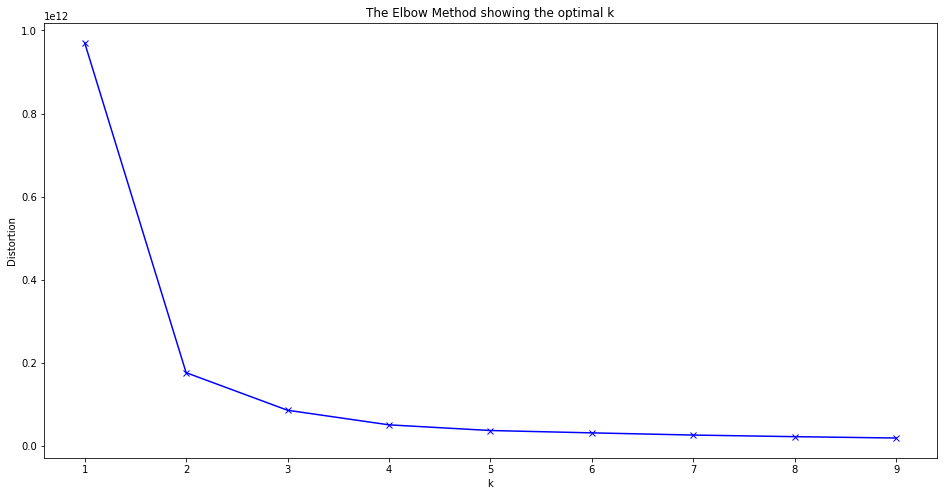

In [5]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
from sklearn.cluster import KMeans
# train
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data3)
data3["label"]=kmeanModel.predict(data3)

In [0]:
value=data3[['칼로리(Kcal)', '탄수화물(g)', '단백질(g)', '지방(g)', '비타민A(mg)', '티아민(mg)',
       '비타민C(mg)', '리보플라빈(mg)', '칼슘(mg)', '철분(mg)']]
label=data3[["label"]]

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(value)
value_transform=scaler.transform(value)

pca = PCA(n_components=2)
pca.fit(value_transform)
X_pca = pca.transform(value_transform)

In [0]:
a=pd.DataFrame(value_transform)
a.columns=['칼로리(Kcal)', '탄수화물(g)', '단백질(g)', '지방(g)', '비타민A(mg)', '티아민(mg)',
       '비타민C(mg)', '리보플라빈(mg)', '칼슘(mg)', '철분(mg)']

In [10]:
# library import

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=4) # 모델 객체 생성
kfold = KFold(n_splits=5)
scores = cross_val_score(model, value, label, cv=5)
print('cross validation score: {}'.format(scores))
print("교차검증의 평균 : %.3f" %(scores.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array w

cross validation score: [0.99937578 1.         1.         1.         1.        ]
교차검증의 평균 : 1.000


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [11]:
# library import

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=5) # 모델 객체 생성
kfold = KFold(n_splits=5)
scores = cross_val_score(model, value, label, cv=5)
print('cross validation score: {}'.format(scores))
print("교차검증의 평균 : %.3f" %(scores.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array w

cross validation score: [0.99937578 1.         1.         1.         1.        ]
교차검증의 평균 : 1.000


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [12]:
# library import

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=6) # 모델 객체 생성
kfold = KFold(n_splits=5)
scores = cross_val_score(model, value, label, cv=5)
print('cross validation score: {}'.format(scores))
print("교차검증의 평균 : %.3f" %(scores.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array w

cross validation score: [0.99812734 1.         1.         1.         1.        ]
교차검증의 평균 : 1.000


In [0]:
pca_value=pd.DataFrame(X_pca)
pca_value=pca_value.reset_index(drop=True)
label=label.reset_index(drop=True)
p=pd.concat([pca_value,label],axis=1)

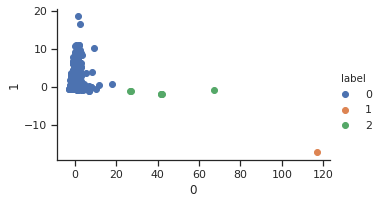

In [14]:
import seaborn
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=p, hue='label', hue_order=[0,1,2], aspect=1.61)
fg.map(plt.scatter, 0, 1).add_legend()

## test

In [0]:
value2=data4[['칼로리(Kcal)', '탄수화물(g)', '단백질(g)', '지방(g)', '비타민A(mg)', '티아민(mg)','리보플라빈(mg)', '비타민C(mg)', '칼슘(mg)', '철분(mg)']]

In [0]:
value2_transform=scaler.transform(value2)
test_pca = pca.transform(value2_transform)

In [18]:
model = KNeighborsClassifier(n_neighbors=5) # 모델 객체 생성
model.fit(X_pca,label) # train으로 학습
y_pred=model.predict(test_pca) # 예측

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
pred=pd.DataFrame(y_pred)
pred.columns=["label"]

In [20]:
pca_value2=pd.DataFrame(test_pca)
pca_value2=pca_value2.reset_index(drop=True)
pred=pred.reset_index(drop=True)
p3=pd.concat([pca_value2,pred],axis=1)
p3

,0,1,label
0,1.564827,22.758716,0
1,1.847418,22.451152,0
2,-0.033604,15.406604,0
3,0.715995,17.097461,0
4,1.291994,19.955815,0
...,...,...,...
1995,1.636867,15.578396,0
1996,0.310965,17.066645,0
1997,0.587375,21.169220,0
1998,0.000132,12.749772,0


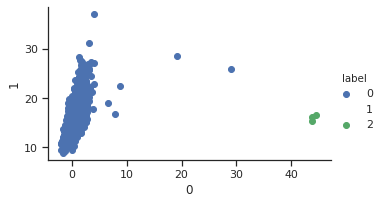

In [21]:
import seaborn
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=p3, hue='label', hue_order=[0,1,2], aspect=1.61)
fg.map(plt.scatter, 0, 1).add_legend()

In [22]:
pred

,label
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0
